In [1]:
# 初始化 MyWAT，测试
from models.MyGL_LowPass import GLLowPass
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model = GLLowPass(if_temporal_graph=True,
                  num_nodes=400, feature_size=6).cuda()
dummy_input = torch.randn(32, 400, 6).cuda()
target = dummy_input
# 假设你的模型有一个损失函数
criterion = torch.nn.MSELoss()

# 创建一个优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 模拟前向传播和计算损失
output = model(dummy_input)  # 模型的前向传播
loss = criterion(output, target)  # 计算损失

# 反向传播，计算梯度
loss.backward()

X_recons = model._compute_forward_results(dummy_input)

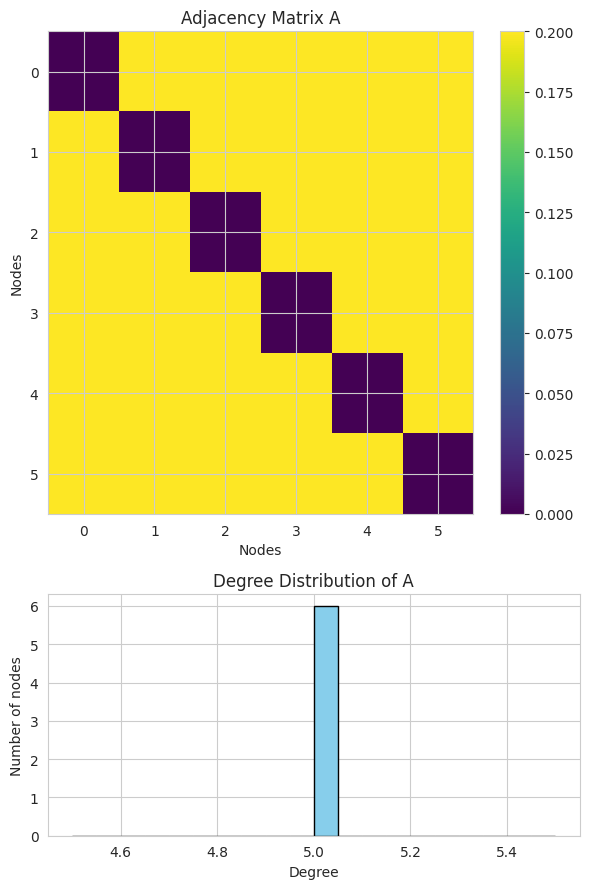

In [2]:
# 创建两个子图：上图高度6，下图高度3，总高度9，宽度6。
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9),
                               gridspec_kw={'height_ratios': [2, 1]})

# 上图：显示邻接矩阵 A 的热图
im1 = ax1.imshow(model.A.detach().cpu().numpy(), cmap="viridis", aspect="auto")
ax1.set_title("Adjacency Matrix A")
ax1.set_xlabel("Nodes")
ax1.set_ylabel("Nodes")
plt.colorbar(im1, ax=ax1)

# 下图：绘制度分布直方图
degrees = (model.A != 0).sum(dim=1)
ax2.hist(degrees.cpu().numpy(), bins=20, color='skyblue', edgecolor='black')
ax2.set_title("Degree Distribution of A")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of nodes")

plt.tight_layout()

In [3]:
# 检查平滑度
import pandas as pd

adj = pd.read_csv("/home/jiayin/PycharmProjects/Spatio-Temporal-Analysis-Telecom-Italia/experiments/experiments/results/GLLowPass_04132226/A.csv").to_numpy()


In [1]:
log_run_tag=["MVSTGN_6_3"]